# Table Of Content
1. [Imports](#Imports)
1. [Previewing data](#Previewing-data)
1. [Data_Manager](#Data_Manager)
    1. [New Features](#New-Feature-Creation)
1. [Visual-analysis](#Visual-analysis)
1. [Distribution-analisys](#Distribution-analisys)
1. [Data-Transformation-analysis](#Data-Transformation-analysis)
    1. [Notebook with TrAnls](btc_eda_skw_investigation.ipynb)
1. [Train-Test-split](#Train-Test-split)

# Imports

In [178]:
import os, sys
import pandas as pd
import seaborn as sns

sys.path.insert(0, "./classes/")
import cls_data

In [179]:
# reloading functions without runtime.restart
import importlib
importlib.reload(cls_data)

<module 'cls_data' from './classes/cls_data.py'>

# Previewing data

In [180]:
dir_path = "../data/csv_numeric_sources/"

In [181]:
# this is for Linux
!ls -lagh {dir_path}

# this is for Windows
# ! dir "../data/"

total 1.5M
drwxrwxr-x 3 1007 4.0K Jun 28 19:44 .
drwxrwxr-x 8 1007 4.0K Jun 28 19:08 ..
drwxr-xr-x 2 1007 4.0K Jun 28 19:07 .ipynb_checkpoints
-rw-rw-r-- 1 1007 126K Jun 28 19:07 BCHAIN-AVBLS.csv
-rw-rw-r-- 1 1007 113K Jun 28 19:08 BCHAIN-CPTRA.csv
-rw-rw-r-- 1 1007 123K Jun 28 19:07 BCHAIN-HRATE.csv
-rw-rw-r-- 1 1007 106K Jun 28 19:07 BCHAIN-MIREV.csv
-rw-rw-r-- 1 1007 105K Jun 28 19:08 BCHAIN-MKTCP.csv
-rw-rw-r-- 1 1007  79K Jun 28 19:08 BCHAIN-MWNTD.csv
-rw-rw-r-- 1 1007  96K Jun 28 19:08 BCHAIN-MWTRV.csv
-rw-rw-r-- 1 1007  97K Jun 28 19:08 BCHAIN-NTRAT.csv
-rw-rw-r-- 1 1007  97K Jun 28 19:08 BCHAIN-TOTBC.csv
-rw-rw-r-- 1 1007 115K Jun 28 19:08 BCHAIN-TOUTV.csv
-rw-rw-r-- 1 1007  99K Jun 28 19:08 BCHAIN-TRFEE.csv
-rw-rw-r-- 1 1007 104K Jun 28 19:08 BCHAIN-TRVOU.csv
-rw-rw-r-- 1 1007 234K Jun 28 19:44 BTC-RatesHistData.csv
-rw-rw-r-- 1 1007 2.5K Jun 28 19:07 files_properties.csv


## Data_Manager

### Init DataManager, previewing BTC data

In [182]:
btc_exch_rates_filename = "BTC-RatesHistData.csv"
data_manager = cls_data.DataManager(dir_path=dir_path, btc_exch_rates_filename=btc_exch_rates_filename)

In [183]:
data_manager.data_btc.isnull().values.sum()

17

#### New FeaturesCreation

In [184]:
# Adding new features from total-to-date features

# BTC_MINED_PDAY
data_manager.feature_calculate(fn=lambda X: X.diff(), 
                               fn_prop=dict(new_feature_name="BTC_MINED_PDAY", base_feat_name='TOTBC'))
# VOL_CHANGE_PDAY
data_manager.feature_calculate(fn=lambda X: X.diff(), 
                               fn_prop=dict(new_feature_name="VOL_CHANGE_PDAY", base_feat_name='Vol'))

# # MWNUS_CH_PDAY ## This file was deleted as it's not being kept up to date
# data_manager.feature_calculate(fn=lambda X: X.diff(), 
#                                  fn_prop=dict(base_feat_name="MWNUS", new_feature_name="MWNUS_CH_PDAY"))

# NTRAT_CH_PDAY
data_manager.feature_calculate(fn=lambda X: X.diff(), 
                                 fn_prop=dict(base_feat_name="NTRAT", new_feature_name="NTRAT_CH_PDAY"))

# Next_day_Price -- will be used in Dense simple network as a target. Otherwise it is a DATA LEAKAGE
data_manager.feature_calculate(fn=lambda X: X.shift(-1), 
                                 fn_prop=dict(base_feat_name="Price", new_feature_name="Next_day_Price"))

True

In [185]:
data_manager.data_btc = data_manager.data_btc.dropna()
data_manager.data_btc[-5:]

,Price,Open,High,Low,Vol,Growth,TOUTV,CPTRA,TOTBC,MKTCP,...,HRATE,MWNTD,TRFEE,AVBLS,MIREV,NTRAT,BTC_MINED_PDAY,VOL_CHANGE_PDAY,NTRAT_CH_PDAY,Next_day_Price
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-20,35595.8,35510.9,36097.9,33378.0,137480.0,0.0023,1.277755e+06,141.962296,18739381.25,6.454874e+11,...,1.040408e+08,45150.0,22.721420,1.262359,2.374305e+07,650422399.0,650.00,32020.0,186816.0,31692.0
2021-06-21,31692.0,35597.9,35708.4,31284.1,256870.0,-0.1097,1.748728e+06,112.785663,18740043.75,6.065590e+11,...,1.040408e+08,57721.0,40.267316,1.353236,2.312670e+07,650588114.0,662.50,119390.0,165715.0,32496.4
2021-06-22,32496.4,31682.7,33272.5,28901.8,309650.0,0.0254,1.936917e+06,100.772155,18740618.75,5.719637e+11,...,9.016866e+07,60552.0,47.796166,1.392933,1.980405e+07,650795691.0,575.00,52780.0,207577.0,33674.3
2021-06-23,33674.3,32498.3,34784.3,31736.5,173340.0,0.0362,1.822712e+06,99.102295,18741268.75,6.306437e+11,...,1.000773e+08,65209.0,56.043097,1.392619,2.362143e+07,650991516.0,650.00,-136310.0,195825.0,34665.8
2021-06-24,34665.8,33678.1,35249.9,32356.7,119250.0,0.0294,1.857830e+06,101.879013,18741925.00,6.543087e+11,...,1.040408e+08,66143.0,48.014584,1.380863,2.376613e+07,651223014.0,656.25,-54090.0,231498.0,31594.0


In [186]:
data_manager.data_btc.index.max()

Timestamp('2021-06-24 00:00:00')

### Features Meaning

In [187]:
data_manager.data_btc.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol', 'Growth', 'TOUTV', 'CPTRA',
       'TOTBC', 'MKTCP', 'TRVOU', 'MWTRV', 'HRATE', 'MWNTD', 'TRFEE', 'AVBLS',
       'MIREV', 'NTRAT', 'BTC_MINED_PDAY', 'VOL_CHANGE_PDAY', 'NTRAT_CH_PDAY',
       'Next_day_Price'],
      dtype='object')

In [188]:
data_manager.data_btc[:5]

,Price,Open,High,Low,Vol,Growth,TOUTV,CPTRA,TOTBC,MKTCP,...,HRATE,MWNTD,TRFEE,AVBLS,MIREV,NTRAT,BTC_MINED_PDAY,VOL_CHANGE_PDAY,NTRAT_CH_PDAY,Next_day_Price
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,44670.09,0.0,3443100.0,0.0,...,0.001615,0.0,0.31,0.000915,0.0,87860.0,19850.0,490.0,627.0,0.1
2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,38158.85,0.0,3462950.0,0.0,...,0.001606,0.0,0.00,0.001064,0.0,88487.0,19850.0,490.0,627.0,0.1
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,36352.93,0.0,3473050.0,0.0,...,0.001823,0.0,0.00,0.001066,0.0,88011.0,10100.0,-310.0,-476.0,0.1
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,38004.54,0.0,3465450.0,0.0,...,0.001823,0.0,0.00,0.000551,0.0,89380.0,-7600.0,320.0,1369.0,0.1
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,40387.12,0.0,3492100.0,0.0,...,0.001751,0.0,0.01,0.000487,0.0,89772.0,26650.0,1580.0,392.0,0.1


In [189]:
data_manager.data_files_prop

,Unnamed: 0,FileName,Meaning,url,csv_url
0,1,BCHAIN-AVBLS.csv,Bitcoin Average Block Size,https://www.quandl.com/data/BCHAIN/AVBLS-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
1,2,BCHAIN-HRATE.csv,Bitcoin Hash Rate,https://www.quandl.com/data/BCHAIN/HRATE-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
2,3,BCHAIN-MIREV.csv,Bitcoin Miners Revenue,https://www.quandl.com/data/BCHAIN/MIREV-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
3,4,BCHAIN-MWNTD.csv,Bitcoin My Wallet Number of Transaction Per Day,https://www.quandl.com/data/BCHAIN/MWNTD-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
4,5,BCHAIN-TOTBC.csv,Total Bitcoins in Circulation,https://www.quandl.com/data/BCHAIN/TOTBC-Total...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
5,6,BCHAIN-CPTRA.csv,Bitcoin Cost Per Transaction,https://www.quandl.com/data/BCHAIN/CPTRA-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
6,7,BCHAIN-TRVOU.csv,Bitcoin USD Exchange Trade Volume,https://www.quandl.com/data/BCHAIN/TRVOU-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
7,8,BCHAIN-MWTRV.csv,Bitcoin My Wallet Transaction Volume,https://www.quandl.com/data/BCHAIN/MWTRV-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
8,10,BCHAIN-TRFEE.csv,Bitcoin Total Transaction Fees,https://www.quandl.com/data/BCHAIN/TRFEE-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
9,11,BCHAIN-TOUTV.csv,Bitcoin Total Output Volume,https://www.quandl.com/data/BCHAIN/TOUTV-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...


## Visual analysis

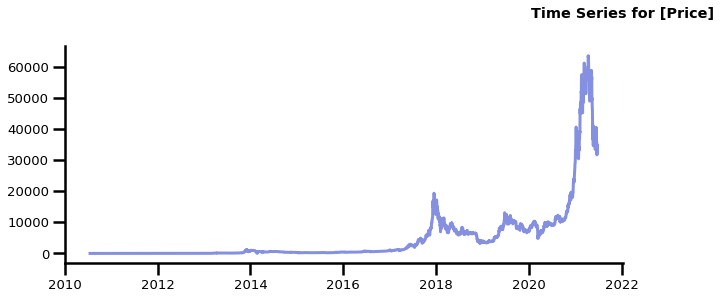

In [190]:
data_manager.plt_plot_ts("Price")

## Price of Bitcoin in 2021

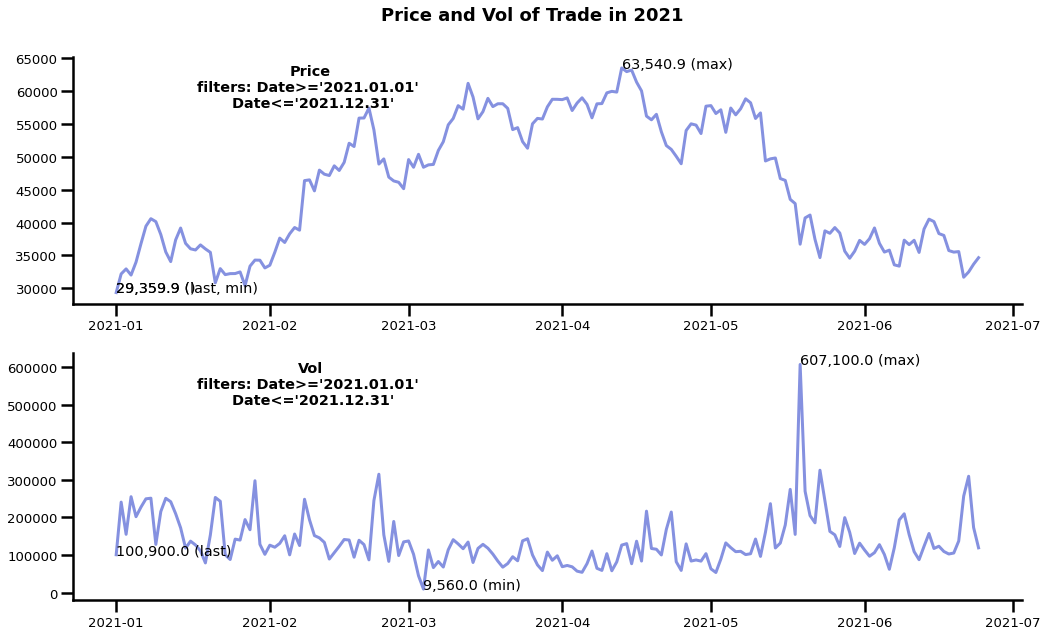

In [191]:
data_manager.plt_plot_multiple_ts(features_to_plt=['Price', 'Vol'], 
                                     titles=dict(fig_title="Price and Vol of Trade in 2021", 
                                            xy=[0.25, .77], 
                                            xy_suptitle=[0.5,.95]), 
                                     tot_figsize=(17,10),
                                     filters=["Date>='2021.01.01'", "Date<='2021.12.31'"], annotate=True)

### Tesla's impact on BTC Price in 2021

let's check how the February Bitcoin boom (i.e. Tesla's purchase of 1B Bitcoin in Feb 08, 2021 and all the hype trades that followed it) influenced price of bitcoin <br>

Articles by the subject: <br>
[[Tesla purchases 1B of BTC]](https://www.cnbc.com/2021/02/08/tesla-buys-1point5-billion-in-bitcoin.html) <br>
[[February chronology]](https://markets.businessinsider.com/currencies/news/bitcoin-price-analysis-february-recap-record-setting-cryptocurrency-2021-2-1030131679)

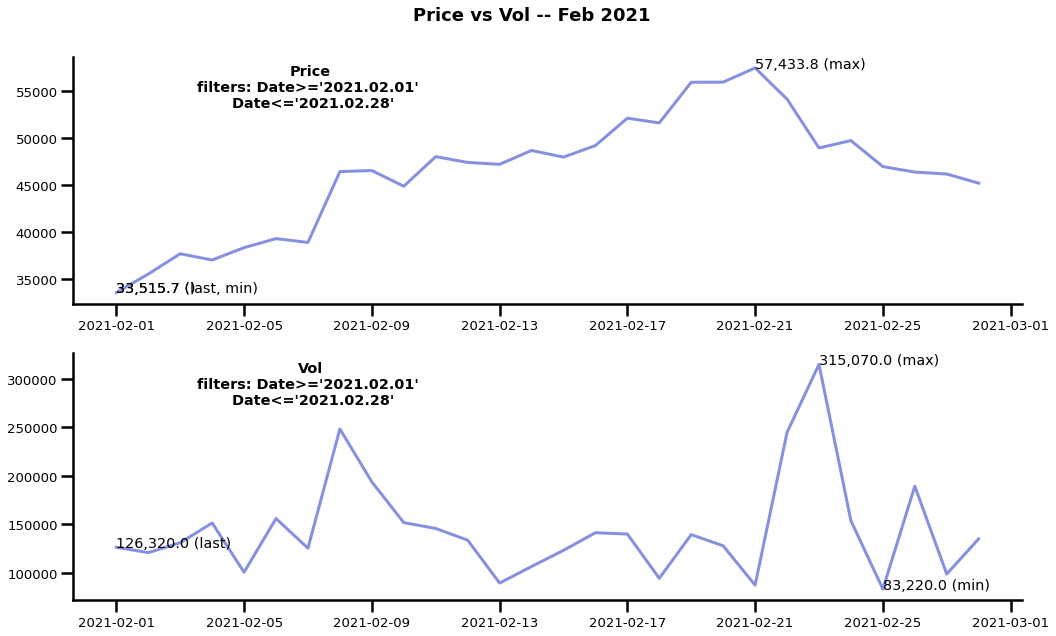

In [192]:
data_manager.plt_plot_multiple_ts(features_to_plt=['Price', 'Vol'], 
                                     titles=dict(fig_title="Price vs Vol -- Feb 2021", 
                                            xy=[0.25, .77], 
                                            xy_suptitle=[0.5,.95]), 
                                     tot_figsize=(17,10),
                                     filters=["Date>='2021.02.01'", "Date<='2021.02.28'"], annotate=True)

So yes, we definitely see the correlation between purchase of Tesla and BTC price jumping up

### Price jump up in 2013
Articles:<br>
[[one person caused BTC to spike]](https://www.cnbc.com/2018/01/23/one-person-caused-bitcoin-to-spike-from-150-to-1000-in-2013.html) <br>[[further thoughts article]](https://techcrunch.com/2018/01/15/researchers-finds-that-one-person-likely-drove-bitcoin-from-150-to-1000/)

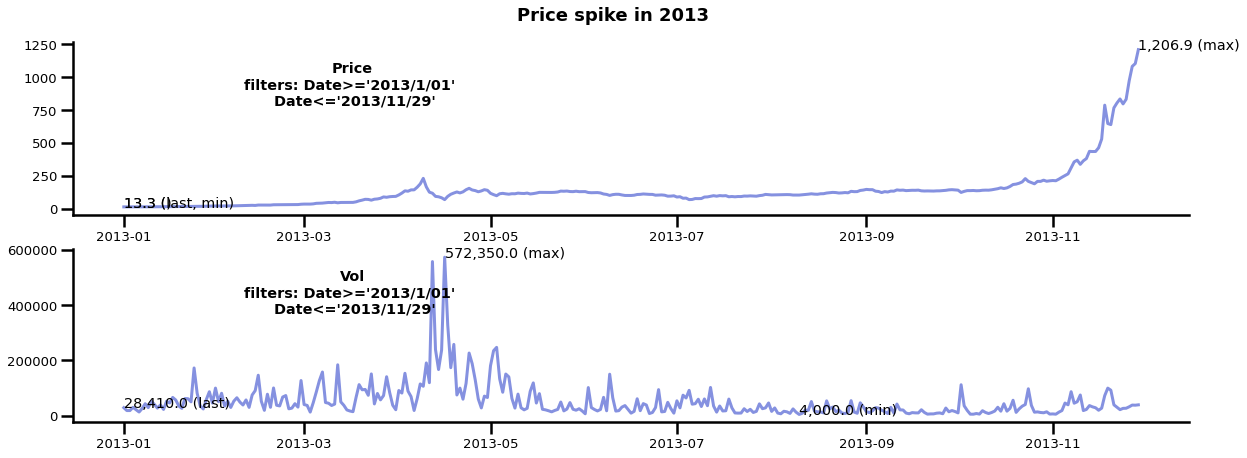

In [193]:
year_s = 2013; year_f = 2013
month_s = 1; month_f = 11
data_manager.plt_plot_multiple_ts(features_to_plt=["Price", "Vol"], 
                                     filters=[f"Date>='{year_s}/{month_s}/01'", f"Date<='{year_f}/{month_f}/29'"],
                                     titles=dict(xy=[.25,.6], fig_title="Price spike in 2013"), 
                                     annotate=True,
                                     tot_figsize=(20,7))

# Distribution analisys

## Distribution

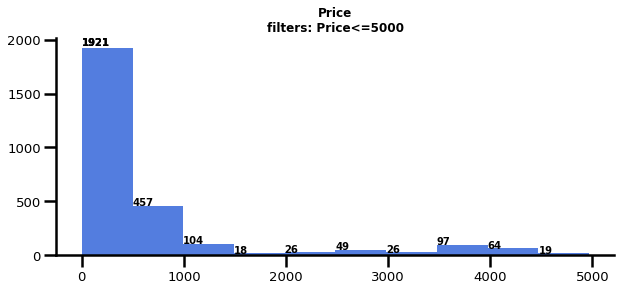

In [194]:
data_manager.plt_hist("Price", bins=10, filters=["Price<=5000"])

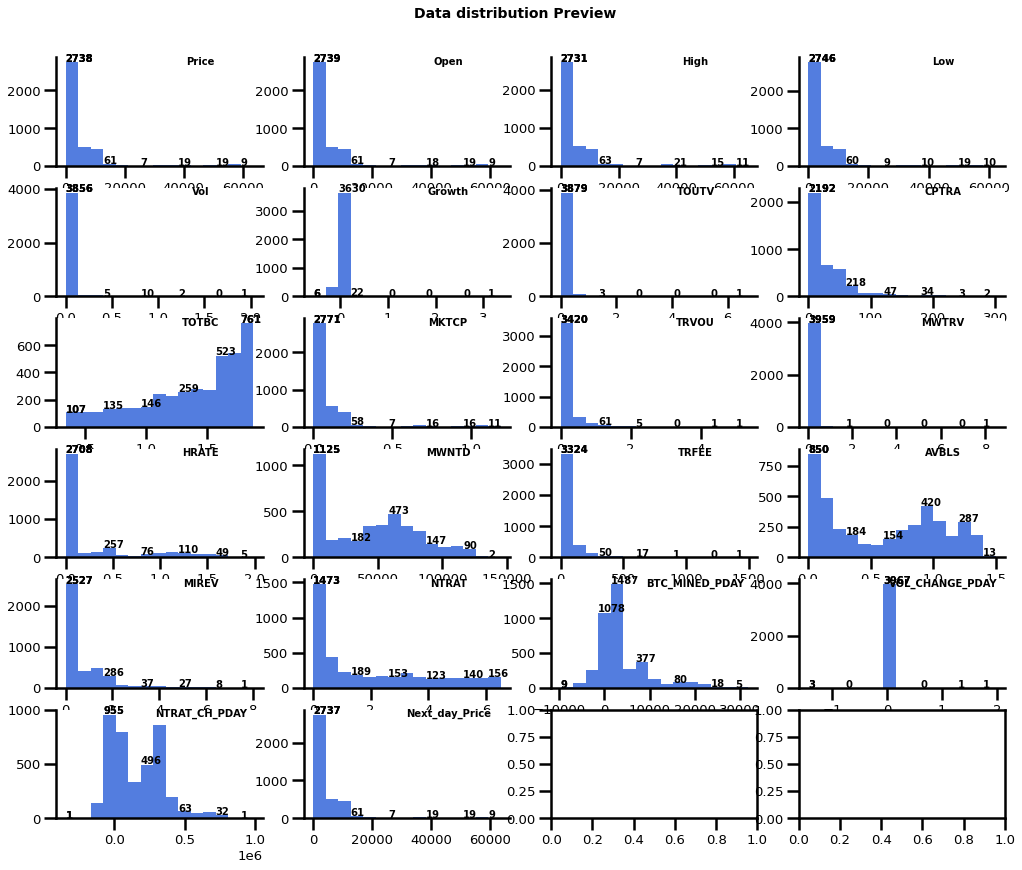

In [195]:
data_manager.plt_hist_grid(figsize=(17,14), bins=15, y=.88, x=.70, ann_fontsize=10)

* all features, exept TOTBTC are highly skewed to the right (positive skw). TOTBTC is skewd to the left

## Pairplot (scatterplots for each couple of features)

In [196]:
# # SR: use only if recalculating! This takes time! =)

# pp = sns.pairplot(data_manager.data_btc.sample(1000, replace=False), plot_kws=dict(marker="+", linewidth=.3));
# pp.fig.set_size_inches(25,25)

In [197]:
# pp.savefig("../data/img/pairplot_btc.png")

#### Precalculated pairplot chart; go to ../data/img/pairplot_btc.png to see in bigger scale
[[jump to img folder]](../data/img)

>>> Precalculated pairplot chart; go to ../data/img/pairplot_btc.png to see in bigger scale


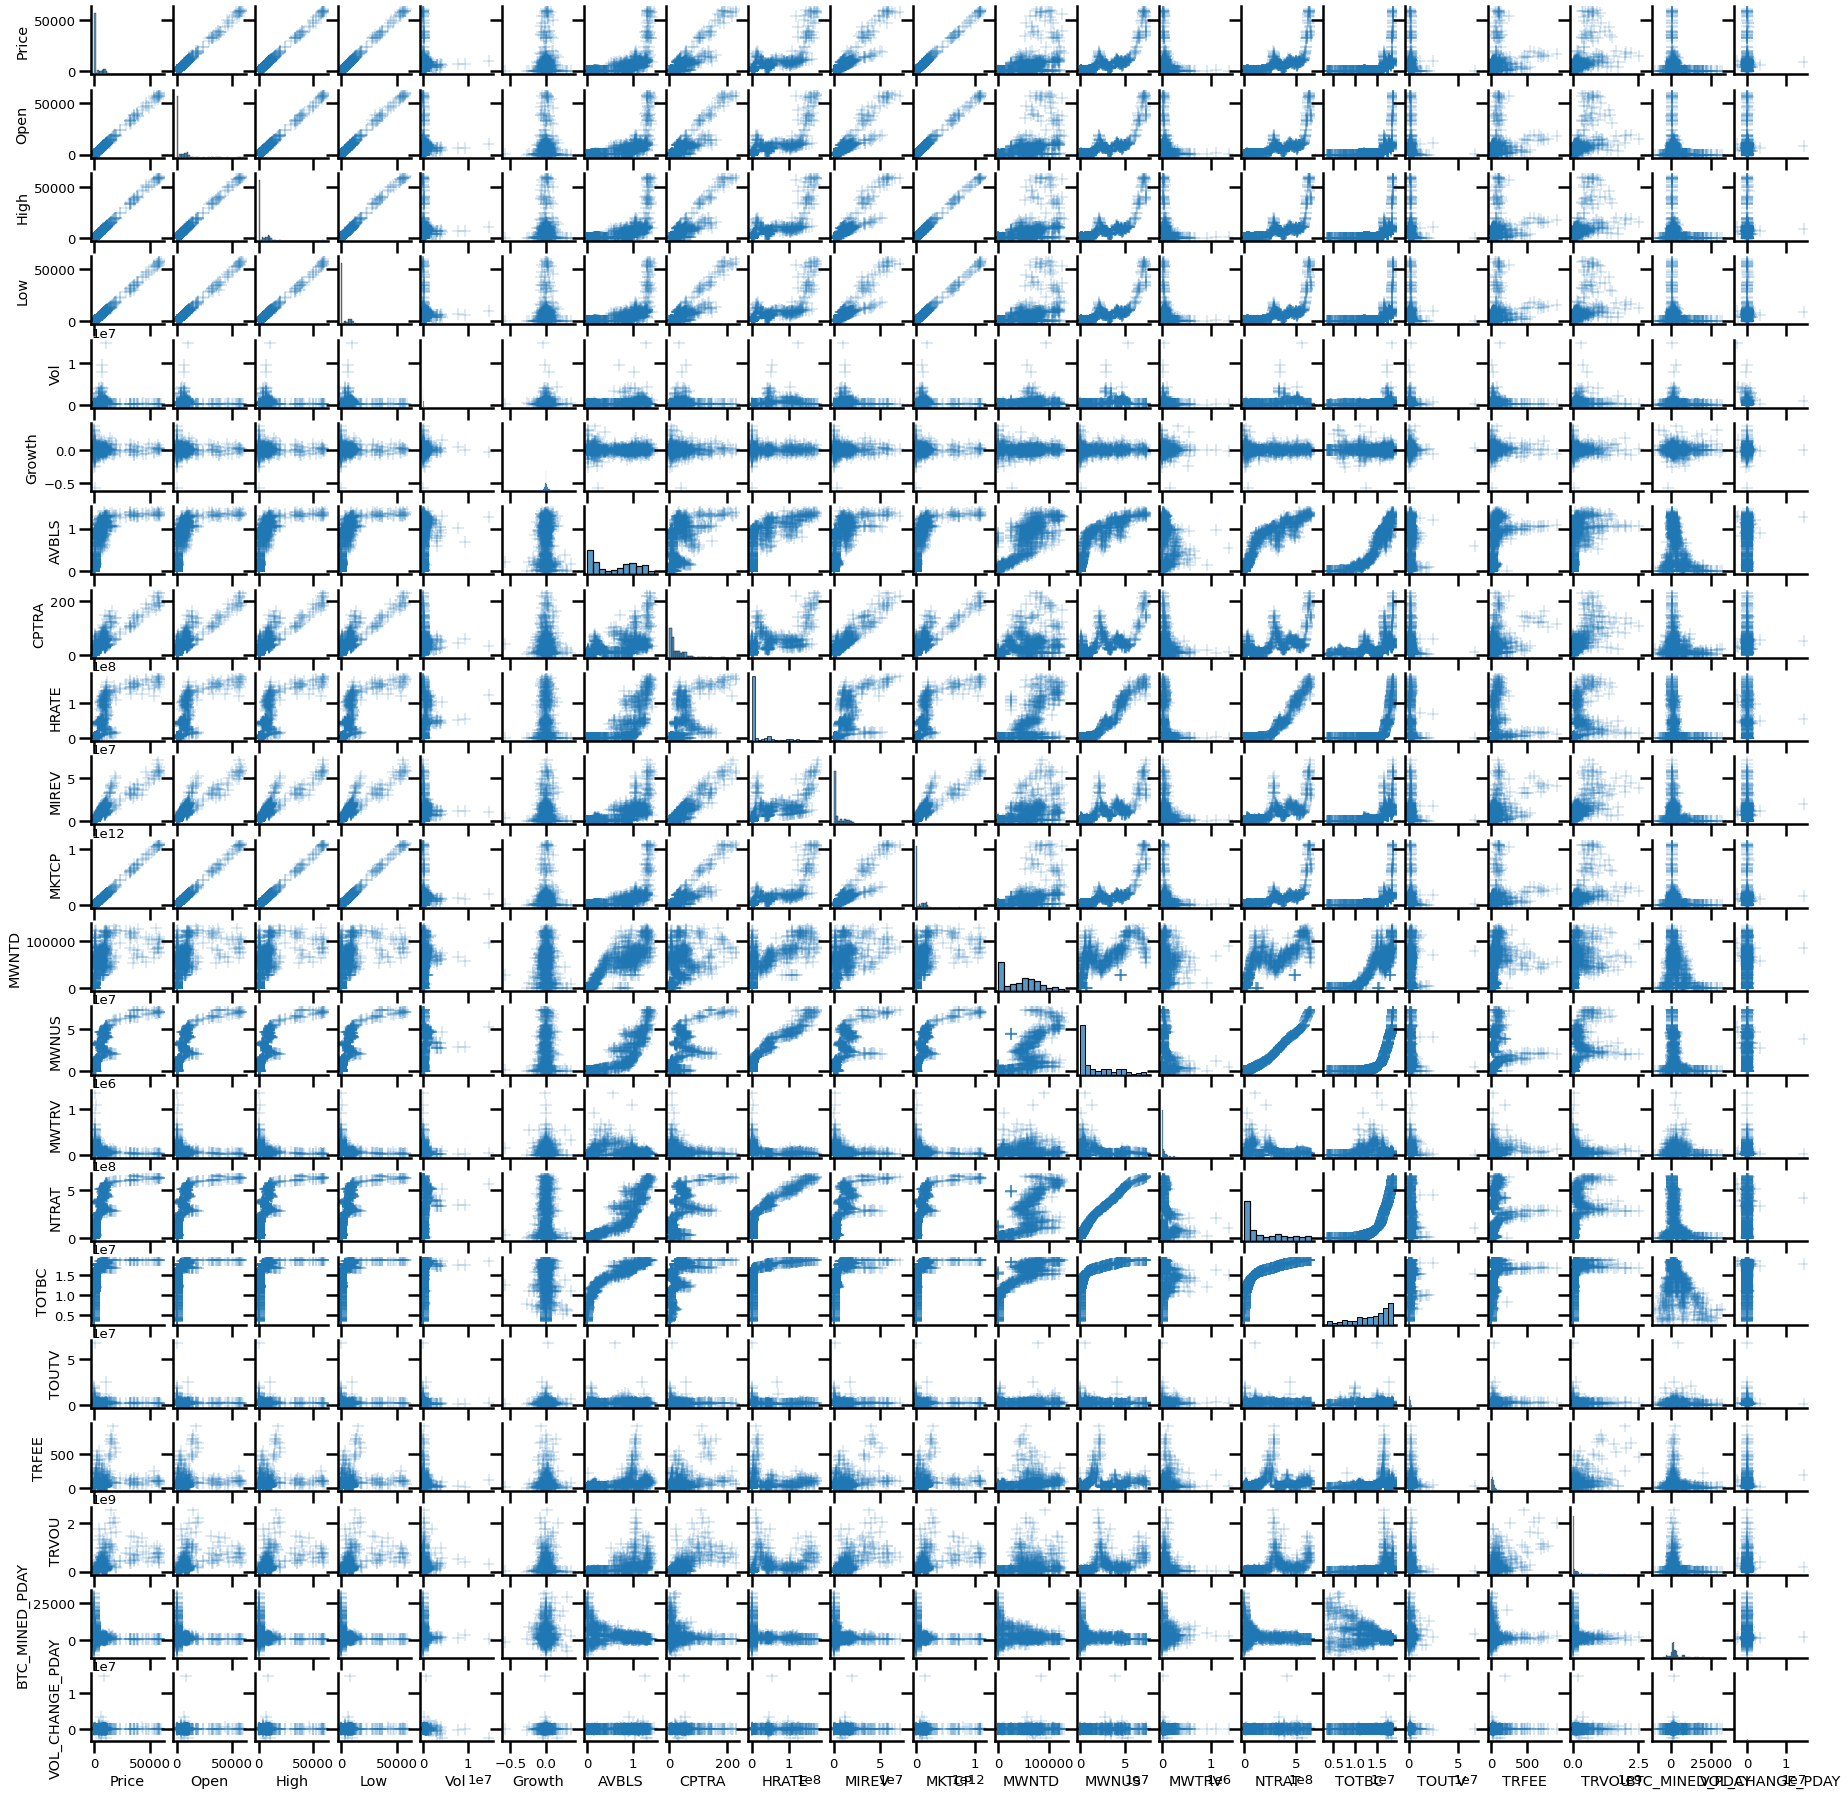

In [198]:
from IPython.display import Image

print(">>> Precalculated pairplot chart; go to ../data/img/pairplot_btc.png to see in bigger scale")

Image(filename='../data/img/pairplot_btc.png')

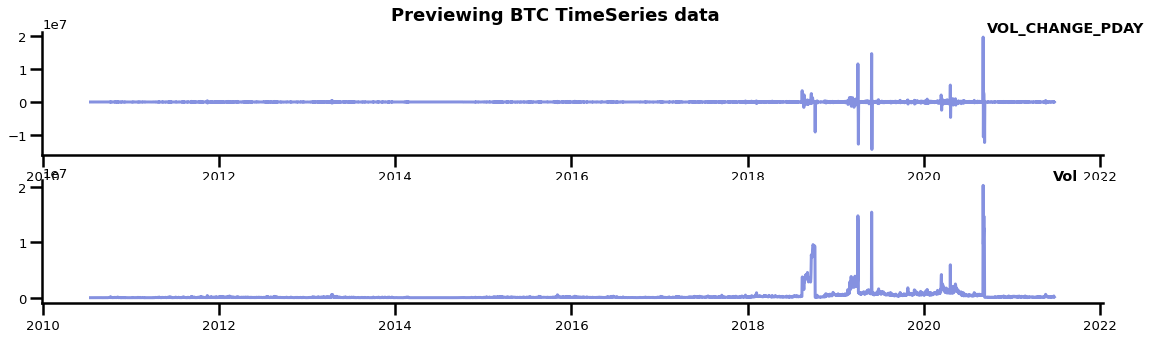

In [199]:
data_manager.plt_plot_multiple_ts(features_to_plt=["VOL_CHANGE_PDAY", "Vol"], 
                                  tot_figsize=(19,5), 
                                  titles=dict(title_loc='center', xy=[.965, .95])
                                 )

_As per Pairplot chart is is cleat that_:
* Price, Open, High, Low are linearly dependent, yet have little different pattern. 
    * as we never know the highest or lowest price of the traiding day until the day is closed
* Vol and VOL_CHANGE_PDAY are linearly dependant plus VOL_CHANGE_PDAY creates linear dependancy with all other features, so we can toss it away
* MKTCP (Market Capitalization) is also linearly dependent with Price (as it is Price * Quantity of Bictoins in Circulation),can be tossed away
* TOTBTC with BTC_MINED_PDAY describe data from different angles and have different pattern of correlation with other features, so both should be left

_Also it is interesting that:_
* trades on the BTC market does not actually get mature -- Vol of trade is approximately the same, with several spikes, that were followed by the same vol of trade drop.


[#Features-Meaning](#Features-Meaning)

## Data Transformation analysis

As we saw [[above]](http://127.0.0.1:8888/notebooks/train/btc_eda_playground.ipynb#Distribution), we have a bunch of features that have big skew in data, so this have to be handled before normalization (before scaling) <br>

### Preview of possible transformations effect

to see skewness correction functions preview [[go to notebook]](./btc_eda_skw_investigation.ipynb)
in the skewness correction I used functions and approaches from [[Skw Article from IBM site]](https://www.ibm.com/support/pages/transforming-variable-normality-parametric-statistics/)<br>

In [200]:
# saving data_manager.data_btc for further usage in notebook above
import pickle

with open(os.path.join("../data/tmp_pckl/", "data_manager_for_swk.pkl"), 'wb') as dm_pkl:
    pickle.dump(data_manager.data_btc, dm_pkl, pickle.HIGHEST_PROTOCOL)

In [201]:
data_manager.data_btc.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol', 'Growth', 'TOUTV', 'CPTRA',
       'TOTBC', 'MKTCP', 'TRVOU', 'MWTRV', 'HRATE', 'MWNTD', 'TRFEE', 'AVBLS',
       'MIREV', 'NTRAT', 'BTC_MINED_PDAY', 'VOL_CHANGE_PDAY', 'NTRAT_CH_PDAY',
       'Next_day_Price'],
      dtype='object')

_We will have to drop features in data that will be transformed:_
* 'MKTCP' as this is just a closing Price * bitcoins in circulation
* 'Growth' as this NN wil learn from Vol
* 'MWTRV'  1415 zero values and no reasonable transformation to Gaussian [[go to see]](btc_eda_skw_investigation.ipynb#MWTRV)
* 'TOTBC' as it is closely related to BTC_MINED_PDAY yet has no reasonable transformation to Gaussian [[go]](btc_eda_skw_investigation.ipynb#TOTBC)
* 'MWNUS' -- no transformation to Gaussian [[go]](btc_eda_skw_investigation.ipynb#MWNUS)
* 'HRATE' -- no transformation to Gaussian [[go]]((btc_eda_skw_investigation.ipynb#HRATE))



* **???** Under the question:
    * 'MIREV' powerTransfYJ +-[[go]](btc_eda_skw_investigation.ipynb#MIREV) [[PT]](btc_eda_skw_investigation.ipynb#Power-Transform)
    * 'MWNTD' -- sqrt +-, yet keeping ~600 zero values [[PT]](btc_eda_skw_investigation.ipynb#Power-Transform#MWNTD)
    * 'CPTRA' -- powerTransfYJ +- [[go]](btc_eda_skw_investigation.ipynb#CPTRA) [[PT]](btc_eda_skw_investigation.ipynb#Power-Transform#MWNTD)
    * 'TRVOU' -- powerTransfYJ +- [[go]](btc_eda_skw_investigation.ipynb#TRVOU) [[PT]](btc_eda_skw_investigation.ipynb#Power-Transform#MWNTD)
    

# Train-Test split

### Dropping extra columns and saving as new train_test_split

In [202]:
data_manager.data_btc.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol', 'Growth', 'TOUTV', 'CPTRA',
       'TOTBC', 'MKTCP', 'TRVOU', 'MWTRV', 'HRATE', 'MWNTD', 'TRFEE', 'AVBLS',
       'MIREV', 'NTRAT', 'BTC_MINED_PDAY', 'VOL_CHANGE_PDAY', 'NTRAT_CH_PDAY',
       'Next_day_Price'],
      dtype='object')

In [203]:
data_manager.data_btc.index.min(), '-->', data_manager.data_btc.index.max()

(Timestamp('2010-07-18 00:00:00'), '-->', Timestamp('2021-06-24 00:00:00'))

In [204]:
data_manager.features_drop(feature_names_list=[
    'MKTCP', 'Growth', 'MWTRV', 'TOTBC', 'MWNUS', 'HRATE', 'MIREV', 'MWNTD', 'CPTRA', 'TRVOU'])

data_manager.data_btc.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol', 'TOUTV', 'TRFEE', 'AVBLS',
       'NTRAT', 'BTC_MINED_PDAY', 'VOL_CHANGE_PDAY', 'NTRAT_CH_PDAY',
       'Next_day_Price'],
      dtype='object')

In [206]:
# first n periods as a train, last period as a test 

# data_manager.data_btc = data_manager.data_btc.loc['2013-10-01':]

data_manager.train_test_split(
    verbose=True,
    test_dates=['2017-05-01', '2021-01-01'], 
    train_dates=['2019-01-02', '2021-06-22'],
#     pct_train=0.5
)

True

In [208]:
print(
    "######### Train ###################\n",
    data_manager.X_train.index.min(), "-->", data_manager.X_train.index.max(), 
    "\n######### Test ###################\n",
    data_manager.X_test.index.min(), "-->", data_manager.X_test.index.max()
)

######### Train ###################
 2019-01-02 00:00:00 --> 2021-06-22 00:00:00 
######### Test ###################
 2017-05-01 00:00:00 --> 2021-01-01 00:00:00


In [209]:
data_manager.save_csv(dataset=data_manager.X_train, dataset_name='X_train_cut', path="../data/csv_to_train/train_test_cut")
data_manager.save_csv(dataset=data_manager.X_test, dataset_name='X_test_cut', path="../data/csv_to_train/train_test_cut")

data_manager.save_csv(dataset=data_manager.y_train, dataset_name='y_train_cut', path="../data/csv_to_train/train_test_cut")
data_manager.save_csv(dataset=data_manager.y_test, dataset_name='y_test_cut', path="../data/csv_to_train/train_test_cut")

>> 'X_train_cut' saved to '../data/csv_to_train/train_test_cut'
>> 'X_test_cut' saved to '../data/csv_to_train/train_test_cut'
>> 'y_train_cut' saved to '../data/csv_to_train/train_test_cut'
>> 'y_test_cut' saved to '../data/csv_to_train/train_test_cut'


# Trial Area

In [ ]:
data_manager.plt_plot_ts('Price', figsize=(15,5))
# data_manager.plt_plot_ts("Price")

In [ ]:
# 2021-05-28
data_manager.data_btc.loc['2021-05-28':'2021-05-30']